In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
data['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [9]:
data.drop(columns='CustomerID',axis=1,inplace=True)

In [10]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
data.rename(columns = {"Genre" : "Gender"},inplace=True)

In [12]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
x = data.drop(columns='Gender',axis=1)
y = data['Gender']

In [14]:
Scaler = StandardScaler()
x_scale = Scaler.fit_transform(x)

In [15]:
x_scale

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### Elbow method for optimal clusters

In [16]:
wcss = []

for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_scale)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[599.9999999999999,
 389.3861889564372,
 295.4562449213556,
 205.22514747675913,
 169.89149793438582,
 134.35277477401493,
 121.38935022502872,
 113.72723000071338,
 102.13623844329254]

Text(0, 0.5, 'WCSS')

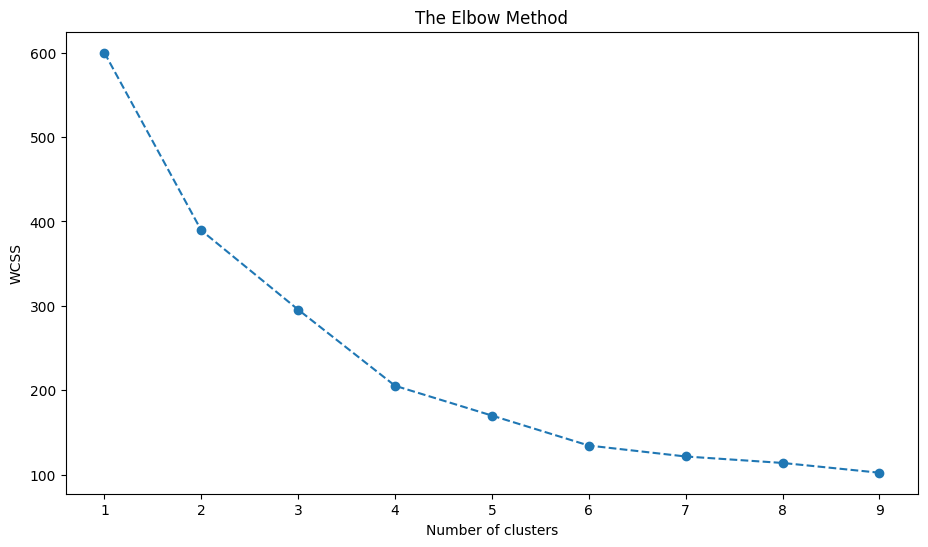

In [18]:
plt.figure(figsize=(11,6))
plt.plot(range(1,10),wcss, linestyle='--', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


#### Possible values for k is 4 and 5(that is where curve starts to flatten)

In [19]:
kmean = KMeans(n_clusters=5,init= 'k-means++',verbose=2,random_state=34)

In [20]:
kmean.fit(x_scale)

Initialization complete
Iteration 0, inertia 379.0145739776308.
Iteration 1, inertia 248.37905069132927.
Iteration 2, inertia 229.83078967677642.
Iteration 3, inertia 219.54579400982806.
Iteration 4, inertia 210.73011997569205.
Iteration 5, inertia 204.1544288857059.
Iteration 6, inertia 201.04030160676575.
Iteration 7, inertia 191.07522623255764.
Iteration 8, inertia 189.16612777219672.
Iteration 9, inertia 189.10584656407732.
Converged at iteration 9: strict convergence.


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,2
,random_state,34
,copy_x,True
,algorithm,'lloyd'


In [21]:
labels = kmean.fit_predict(x_scale)

Initialization complete
Iteration 0, inertia 379.0145739776308.
Iteration 1, inertia 248.37905069132927.
Iteration 2, inertia 229.83078967677642.
Iteration 3, inertia 219.54579400982806.
Iteration 4, inertia 210.73011997569205.
Iteration 5, inertia 204.1544288857059.
Iteration 6, inertia 201.04030160676575.
Iteration 7, inertia 191.07522623255764.
Iteration 8, inertia 189.16612777219672.
Iteration 9, inertia 189.10584656407732.
Converged at iteration 9: strict convergence.


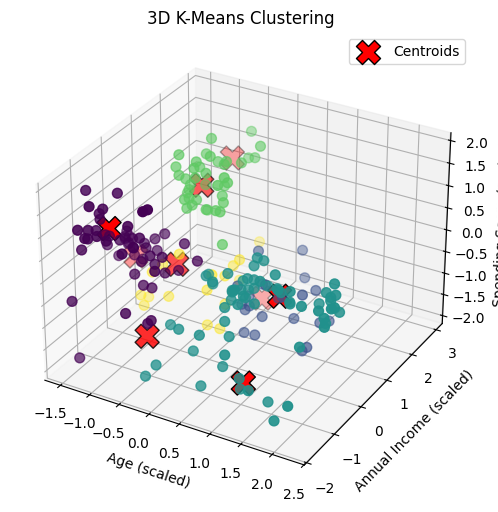

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot scaled points
ax.scatter(
    x_scale[:, 0],
    x_scale[:, 1],
    x_scale[:, 2],
    c=labels,
    cmap='viridis',
    s=50
)

# Plot scaled centroids
centers = kmeans.cluster_centers_
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    centers[:, 2],
    c='red',
    s=300,
    marker='X',
    label='Centroids',
    edgecolor = 'black'
)

# Labels and title
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.set_title('3D K-Means Clustering')

ax.legend()
plt.show()


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_scale,labels)

In [24]:
score

0.37049525814821566

In [25]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
label_db = dbscan.fit_predict(x_scale)

In [26]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x_scale,label_db))

0.18451372756506046


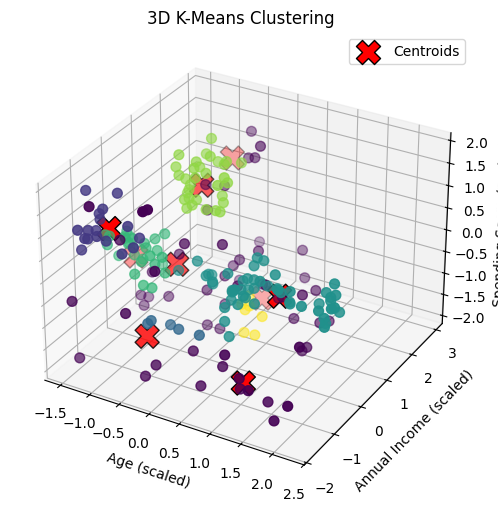

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot scaled points
ax.scatter(
    x_scale[:, 0],
    x_scale[:, 1],
    x_scale[:, 2],
    c=label_db,
    cmap='viridis',
    s=50
)

# Plot scaled centroids
centers = kmeans.cluster_centers_
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    centers[:, 2],
    c='red',
    s=300,
    marker='X',
    label='Centroids',
    edgecolor = 'black'
)

# Labels and title
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.set_title('3D K-Means Clustering')

ax.legend()
plt.show()

#### Without Age


In [28]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [29]:
~x['Age']

0     -20
1     -22
2     -21
3     -24
4     -32
       ..
195   -36
196   -46
197   -33
198   -33
199   -31
Name: Age, Length: 200, dtype: int64

In [30]:
x_scle = Scaler.fit_transform(x.drop(columns='Age'))

In [31]:
x_scle

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [32]:
wcsss = []

for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_scle)
    
    # inertia method returns wcss for that model
    wcsss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

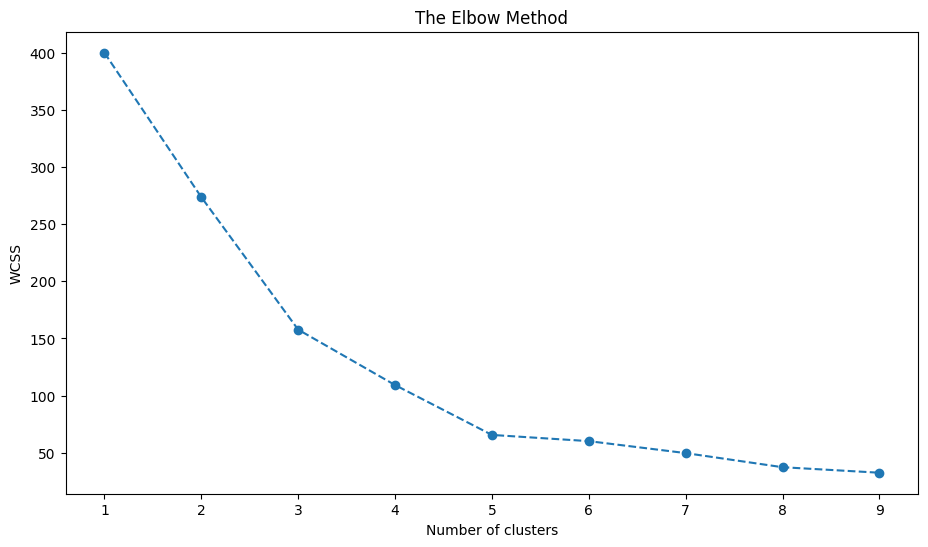

In [33]:
plt.figure(figsize=(11,6))
plt.plot(range(1,10),wcsss, linestyle='--', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [34]:
kmeanss = KMeans(n_clusters=5,init='k-means++',random_state=45)

In [35]:
lab = kmeanss.fit_predict(x_scle)

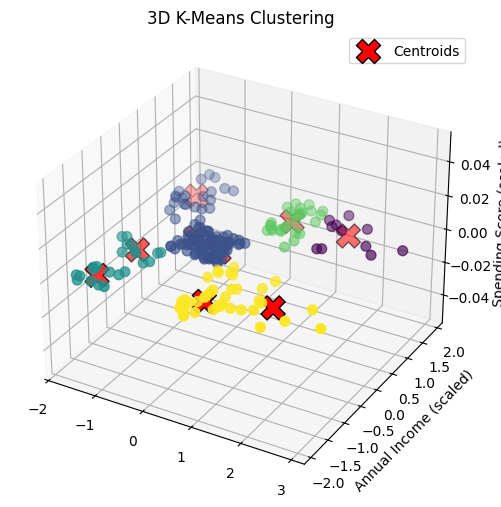

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot scaled points
ax.scatter(
    x_scle[:, 0],
    x_scle[:, 1],
    c=lab,
    cmap='viridis',
    s=50
)

# Plot scaled centroids
centers = kmeans.cluster_centers_
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=300,
    marker='X',
    label='Centroids',
    edgecolor = 'black'
)

# Labels and title
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.set_title('3D K-Means Clustering')

ax.legend()
plt.show()


In [37]:
print(silhouette_score(x_scle,lab))

0.4609896913924817


#### With binning(Age group)

In [38]:
x['Age'].min()

np.int64(18)

In [39]:
bins = [18, 25, 35, 45, 55, 70]
labels = [0, 1, 2, 3, 4]

In [40]:
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)

In [41]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,1


In [42]:
x_age = data.drop(columns=['Gender','Age'])

In [43]:
x_age

,Annual Income (k$),Spending Score (1-100),AgeGroup
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,1
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,1


In [44]:
x_sc = Scaler.fit_transform(x_age)

In [45]:

la = kmeans.fit_predict(x_sc)

In [46]:
print(silhouette_score(x_sc,la))

0.4075715464448815


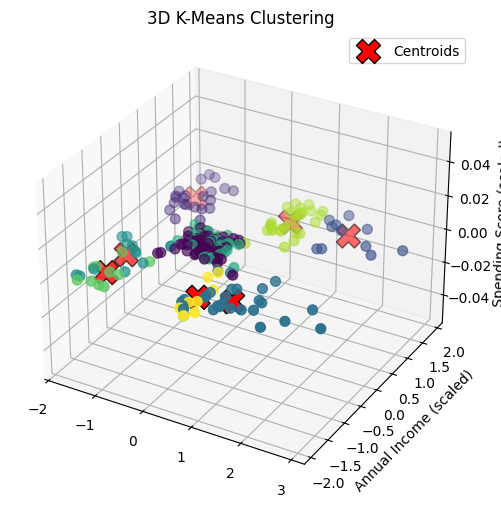

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot scaled points
ax.scatter(
    x_sc[:, 0],
    x_sc[:, 1],
    c=la,
    cmap='viridis',
    s=50
)

# Plot scaled centroids
centers = kmeans.cluster_centers_
ax.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=300,
    marker='X',
    label='Centroids',
    edgecolor = 'black'
)

# Labels and title
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')
ax.set_title('3D K-Means Clustering')

ax.legend()
plt.show()


Using DBSCAN for eps

In [48]:
import numpy as mp

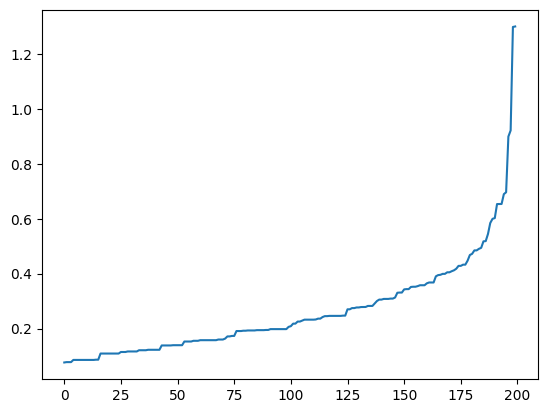

In [49]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(x_scle)
distances, _ = nbrs.kneighbors(x_scle)
distances = mp.sort(distances[:, 4])

plt.plot(distances)
plt.show()


In [50]:
dbscan = DBSCAN(eps=0.41,min_samples=5)
label_dbe = dbscan.fit_predict(x_scle)

In [51]:
print(silhouette_score(x_scle,label_dbe))

0.3127529652907223
